In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/incident_profile_95.csv')
df.columns.sort_values()

Index(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH', 'CRASH_YEAR',
       'adverse_weather_crash_rate', 'avg_age', 'avg_crash_severity_score',
       'avg_lighting_severity', 'avg_responsibility_score',
       'avg_roadway_severity', 'avg_weather_severity',
       'combined_weather_road_severity', 'damage_cost_LB', 'damage_high',
       'damage_low', 'damage_medium', 'fatality_rate', 'injury_severity_score',
       'male_ratio', 'neo_patented_drivers', 'night_crash_rate',
       'num_towed_units_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers',
       'road_defect_crash_rate', 'senior_drivers', 'severe_injury_rate',
       'speeding_influence', 'sum_category_motorcycle',
       'sum_category_off-road/specialized', 'sum_category_passenger vehicle',
       'sum_category_public transport', 'sum_category_truck/commercial',
       'sum_damage_category_high', 'sum_damage_category_low',
       'sum_damage_category_medium', 'sum_lighting_category_daylight',
       'sum_lighting_category_night', 's

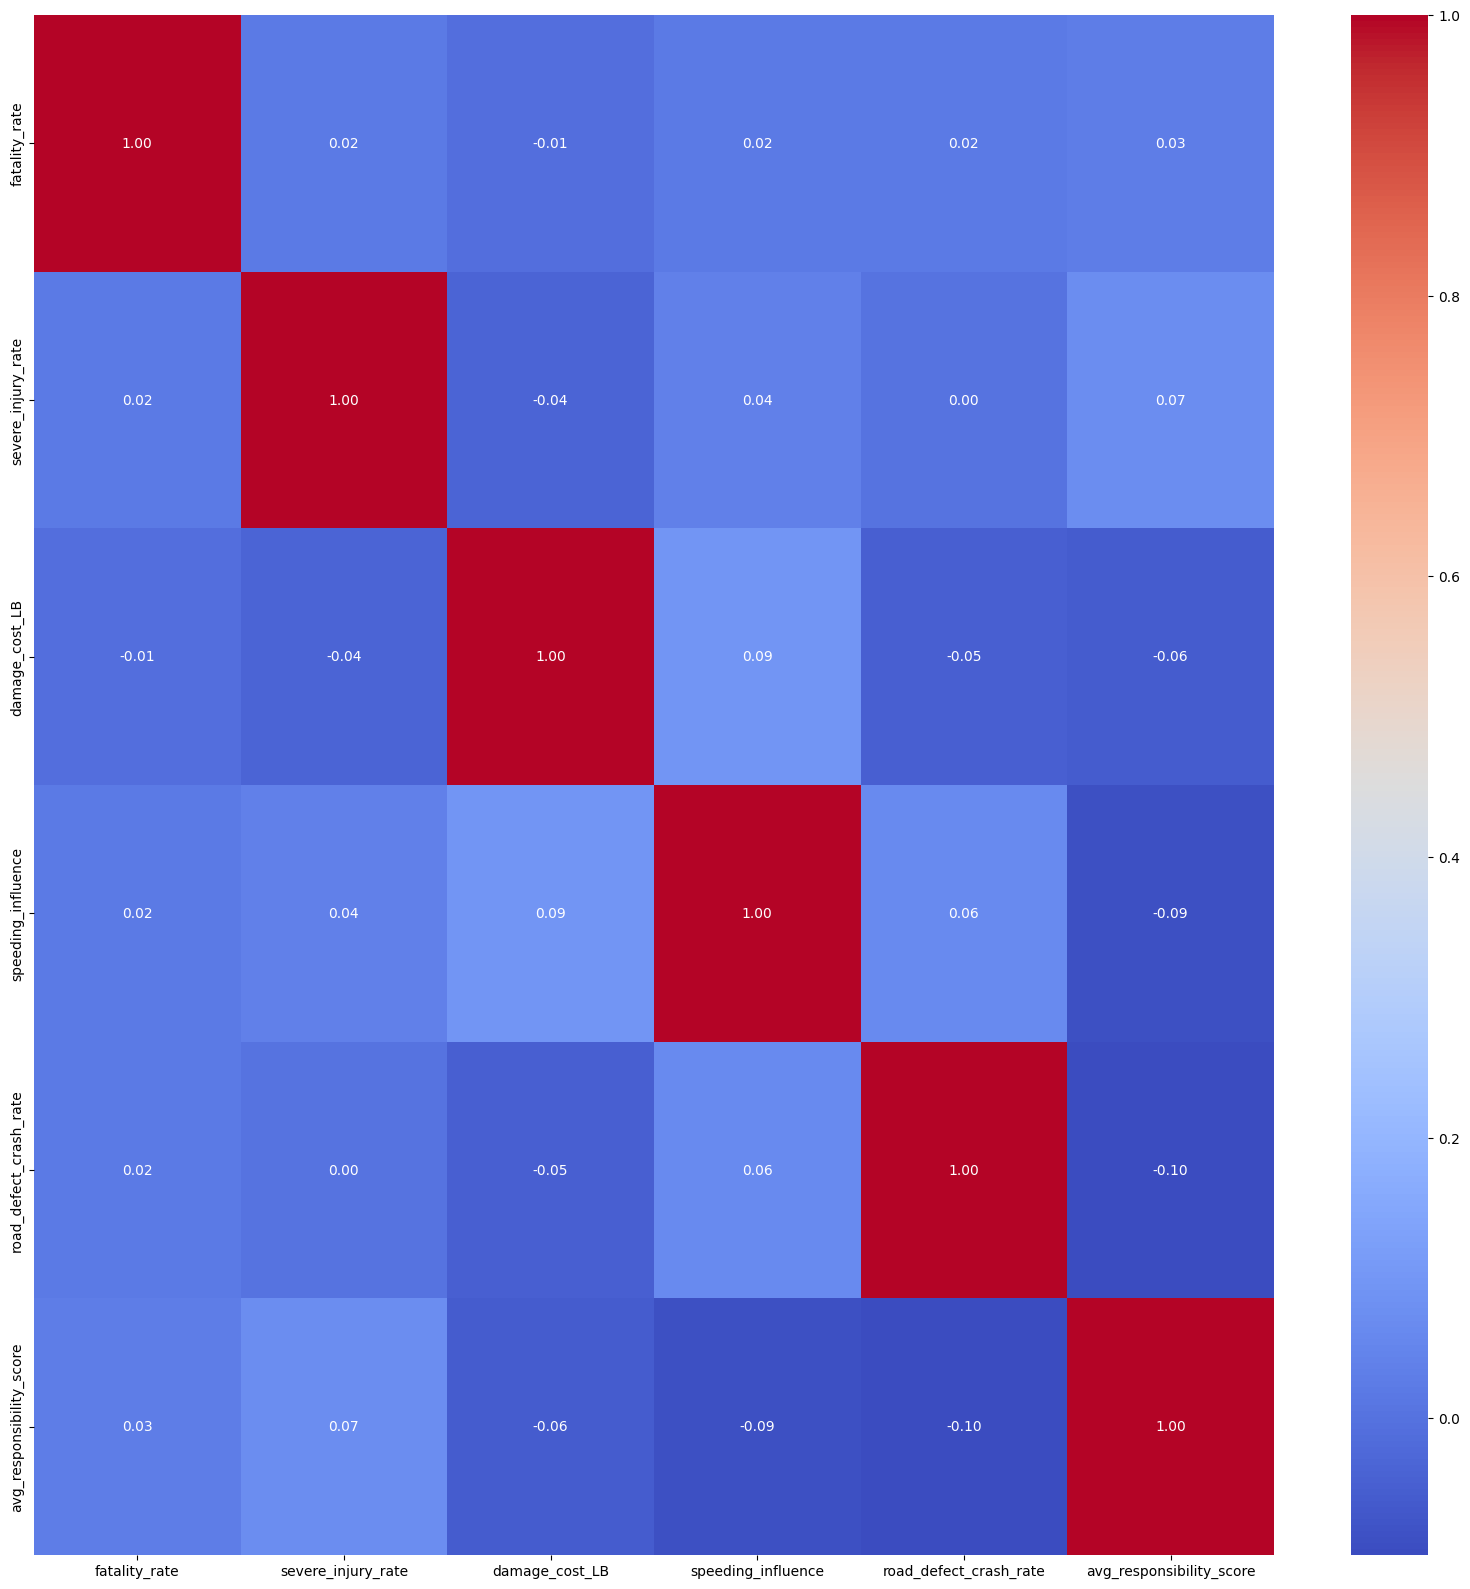

In [2]:
#dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

selected_features = ['avg_age', 'avg_weather_severity', 'fatality_rate', 'severe_injury_rate', 
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate']

selected_features = ['fatality_rate', 'severe_injury_rate', 'damage_cost_LB', 'speeding_influence', 'road_defect_crash_rate', 'avg_responsibility_score']

plt.figure(figsize=(20, 20))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [3]:
scaler_ss = StandardScaler()
df_cluster_ss = scaler_ss.fit_transform(df[selected_features])
df_cluster_ss = pd.DataFrame(df_cluster_ss, columns=df[selected_features].columns)
df_cluster_ss.head()

,fatality_rate,severe_injury_rate,damage_cost_LB,speeding_influence,road_defect_crash_rate,avg_responsibility_score
0,-0.167177,-0.649944,-0.800017,-0.380612,-0.600599,-0.514334
1,-0.167177,-0.649944,-1.021830,-1.011187,-0.600599,-0.325562
2,-0.167177,-0.649944,-0.777836,-0.380612,-0.600599,0.010793
3,-0.167177,0.290063,0.663944,1.606295,0.584639,-1.074355
4,-0.167177,-0.649944,0.153776,0.039772,0.271868,-1.206494


In [11]:
#dbscan

dbscan = DBSCAN(eps=0.5, min_samples=20)
dbscan.fit(df_cluster_ss)
df['dbscan'] = dbscan.labels_
df['dbscan'].value_counts()

dbscan
 0    18174
-1     6904
Name: count, dtype: int64

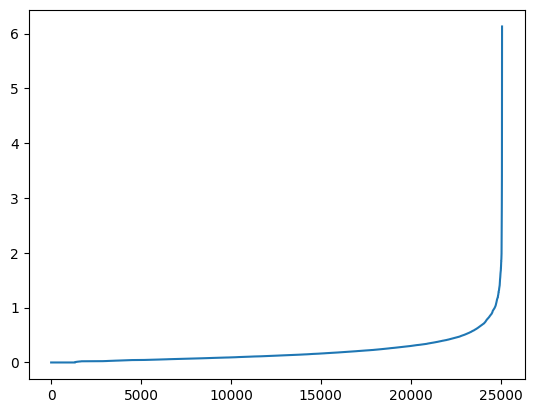

In [12]:
#find the best eps
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(df_cluster_ss)
distances, indices = nbrs.kneighbors(df_cluster_ss)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()


In [13]:
#number of clusters
df['dbscan'].nunique()

2